In [81]:
import pandas as pd #data processing
import numpy as np #calculate stuff
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
import plotly.graph_objects as go

In [2]:
# Reading the csv file
pkmn=pd.read_csv('pokemon2.csv')

In [3]:
# Taking a overview 
pkmn.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
# Examining each variale and weather or not there are missing values
pkmn.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [5]:
### repalcing missing values

height_array = pkmn[pkmn["height_m"]!=np.nan]["height_m"]
pkmn["height_m"].replace(np.nan,height_array.mean(),inplace=True)

weight_array = pkmn[pkmn["weight_kg"]!=np.nan]["weight_kg"]
pkmn["weight_kg"].replace(np.nan,weight_array.mean(),inplace=True)

per_male = pkmn[pkmn["percentage_male"]!=np.nan]["percentage_male"]
pkmn["percentage_male"].replace(np.nan,weight_array.mean(),inplace=True)

In [6]:
# checking if everything is replaced

pkmn.info()

# it is okay to have type 2 missing values. Not all pokemons have two types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

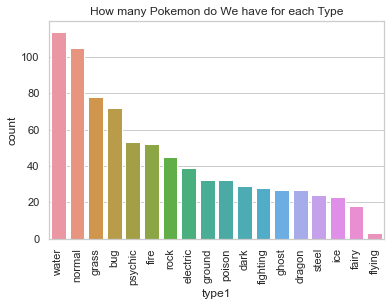

In [50]:
# Let's check what is the most dominant type 1
sns.countplot(x='type1', data=pkmn, order=pkmn['type1'].value_counts().index)
plt.xticks(rotation=90)
plt.title("How many Pokemon do We have for each Type")
plt.show()


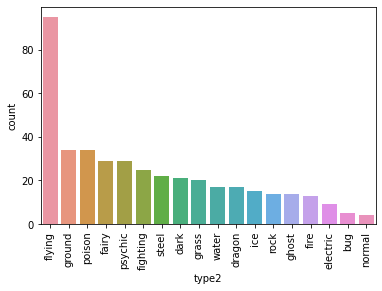

In [8]:
# Let's check what is the most dominant type 2
sns.countplot(x='type2', data=pkmn, order=pkmn['type2'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


In [9]:
#Checking the weakest pokemon based on total stats
pkmn_sort = pkmn.sort_values(by='base_total')
#pokemon with 10 lowest stats
print(pkmn_sort[['name', 'base_total','is_legendary']].head(10))

           name  base_total  is_legendary
190     Sunkern         180             0
297     Azurill         190             0
400   Kricketot         194             0
264     Wurmple         195             0
9      Caterpie         195             0
12       Weedle         195             0
279       Ralts         198             0
663  Scatterbug         200             0
348      Feebas         200             0
128    Magikarp         200             0


In [10]:
#Checking the strongest pokemon based on total stats
print(pkmn_sort[['name', 'base_total','is_legendary']].tail(10))

         name  base_total  is_legendary
645    Kyurem         700             1
380    Latios         700             1
379    Latias         700             1
444  Garchomp         700             0
717   Zygarde         708             1
492    Arceus         720             1
382   Groudon         770             1
381    Kyogre         770             1
383  Rayquaza         780             1
149    Mewtwo         780             1


5    156
1    151
3    135
4    107
2    100
7     80
6     72
Name: generation, dtype: int64


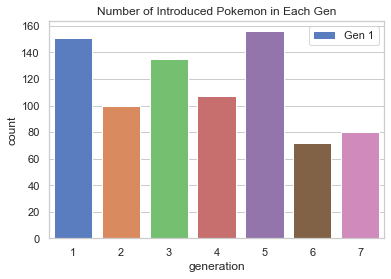

In [87]:
#How many new pokemon in each generation?

print(pkmn['generation'].value_counts())

sns.countplot(x='generation', data=pkmn)
plt.title("Number of Introduced Pokemon in Each Gen")
plt.legend(labels=["Gen 1","Gen 2","Gen 3","Gen 4","Gen 5","Gen 6","Gen 7"], loc="best")
plt.show()

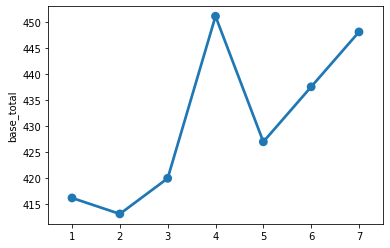

In [12]:
# Grouping by legendary and checking the mean of total stats for each generation. Just a way to see if pokemon are getting
#stronger throughout the generations
pokemon_groups = pkmn.groupby('generation')
pokemon_groups_mean = pokemon_groups.mean()

sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['base_total'])
plt.show()

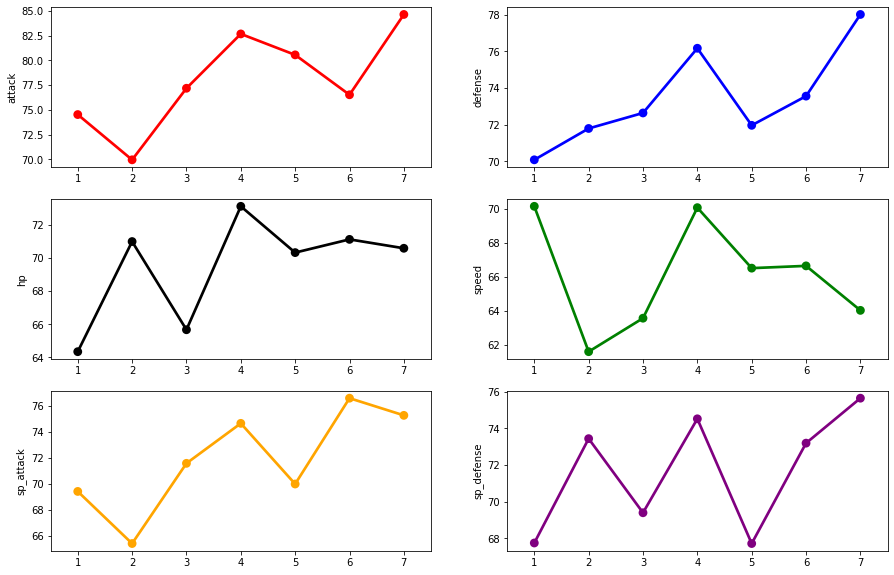

In [13]:
#Doing the same thing as aove but for each pokmeon stat
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['attack'], color='red', ax=axes[0][0])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['defense'], color='blue', ax=axes[0][1])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['hp'], color='black', ax=axes[1][0])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['speed'], color='green', ax=axes[1][1])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['sp_attack'], color='orange', ax=axes[2][0])
sns.pointplot(x=pokemon_groups_mean.index.values, y=pokemon_groups_mean['sp_defense'], color='purple', ax=axes[2][1])

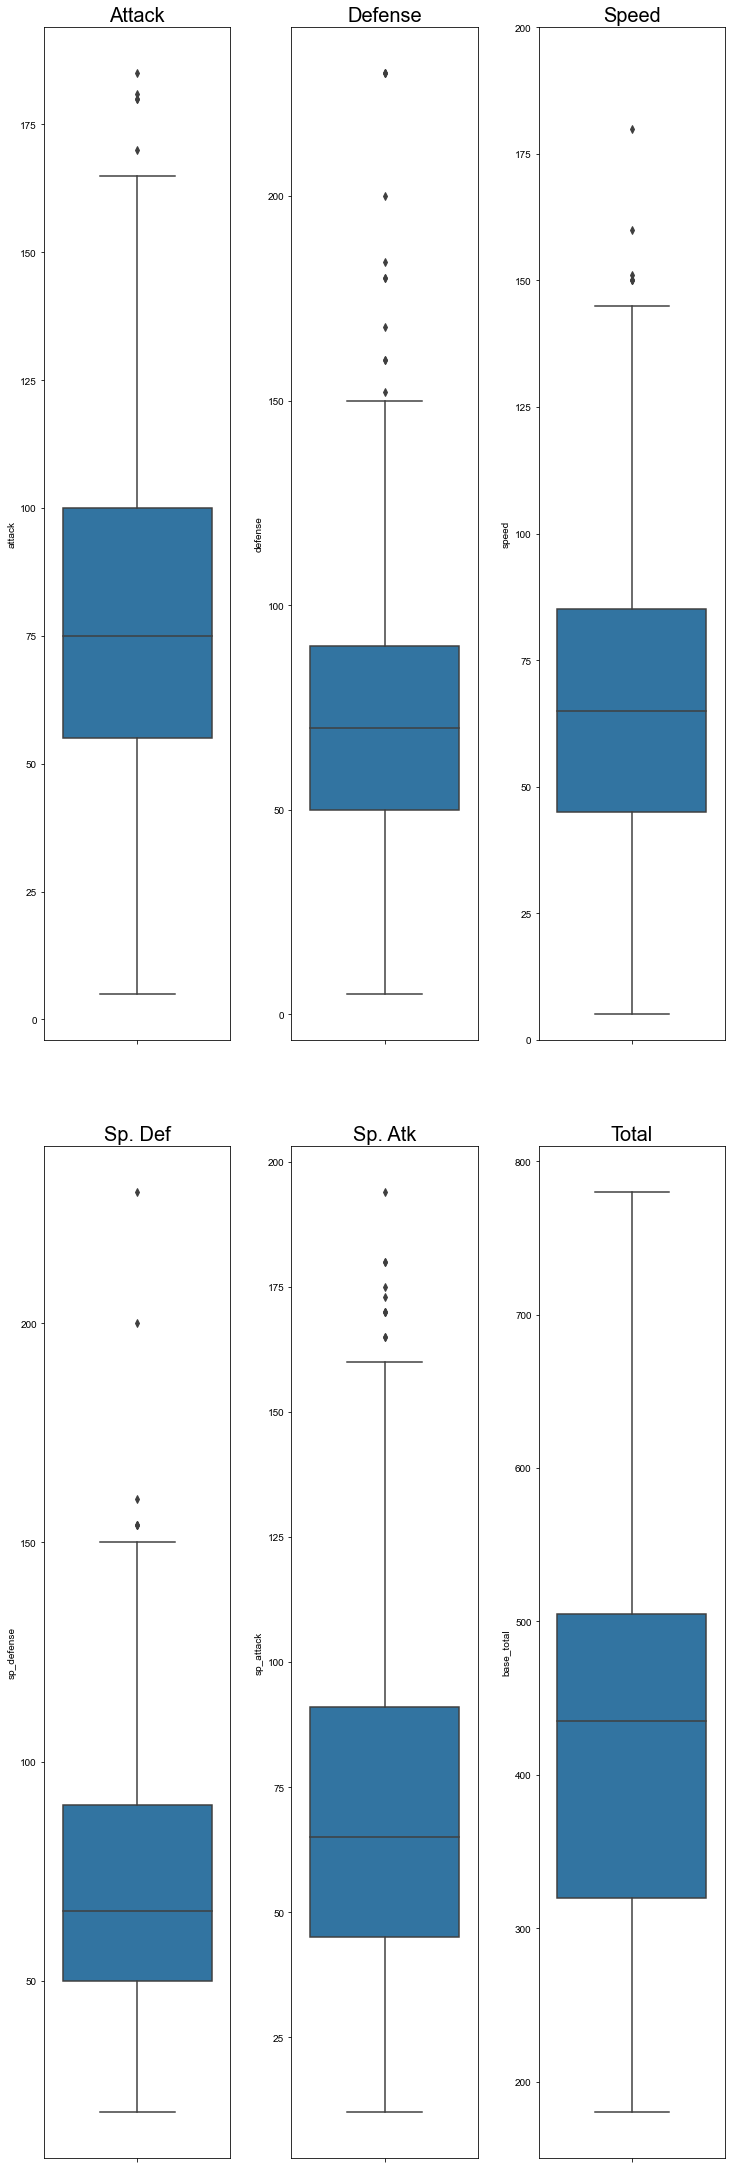

In [14]:
#Doing a boxplot for each stat
fig, axs = plt.subplots(2, 3, figsize = (10,30))

ax1 = plt.subplot2grid((2, 3), (0, 0)) 
ax2 = plt.subplot2grid((2, 3), (0, 1))
ax3 = plt.subplot2grid((2, 3), (0, 2))
ax4 = plt.subplot2grid((2, 3), (1, 1))
ax5 = plt.subplot2grid((2, 3), (1, 0))
ax6 = plt.subplot2grid((2, 3), (1, 2))


fig.tight_layout(pad = 0.4, w_pad = 3.0, h_pad = 8.5)

ax1.set_title("Attack", fontsize =20)
ax2.set_title("Defense", fontsize =20)
ax3.set_title("Speed", fontsize =20)
ax4.set_title("Sp. Atk", fontsize =20)
ax5.set_title("Sp. Def", fontsize =20)
ax6.set_title("Total", fontsize =20)
ax3.set_ylim(0, 200)

sns.boxplot(y = "attack",
            data = pkmn,  ax=ax1) 
sns.boxplot(y = "defense",
            data = pkmn, ax=ax2)


sns.boxplot(y = "speed", 
            data = pkmn, ax=ax3)


sns.boxplot( y = "sp_attack",
            data = pkmn, ax=ax4)


sns.boxplot(y = "sp_defense", 
            data = pkmn, ax=ax5)


sns.boxplot( y = "base_total", 
            data = pkmn, ax=ax6)

sns.set_context("paper") # aesthetics
sns.set(style="whitegrid", palette="muted")


plt.show()

#We can see outliers in each stat. Yet removing them would ruin everything because these are legendary pokemon and 
#Our aim is to predict wheater a pokmeon is legendary or not

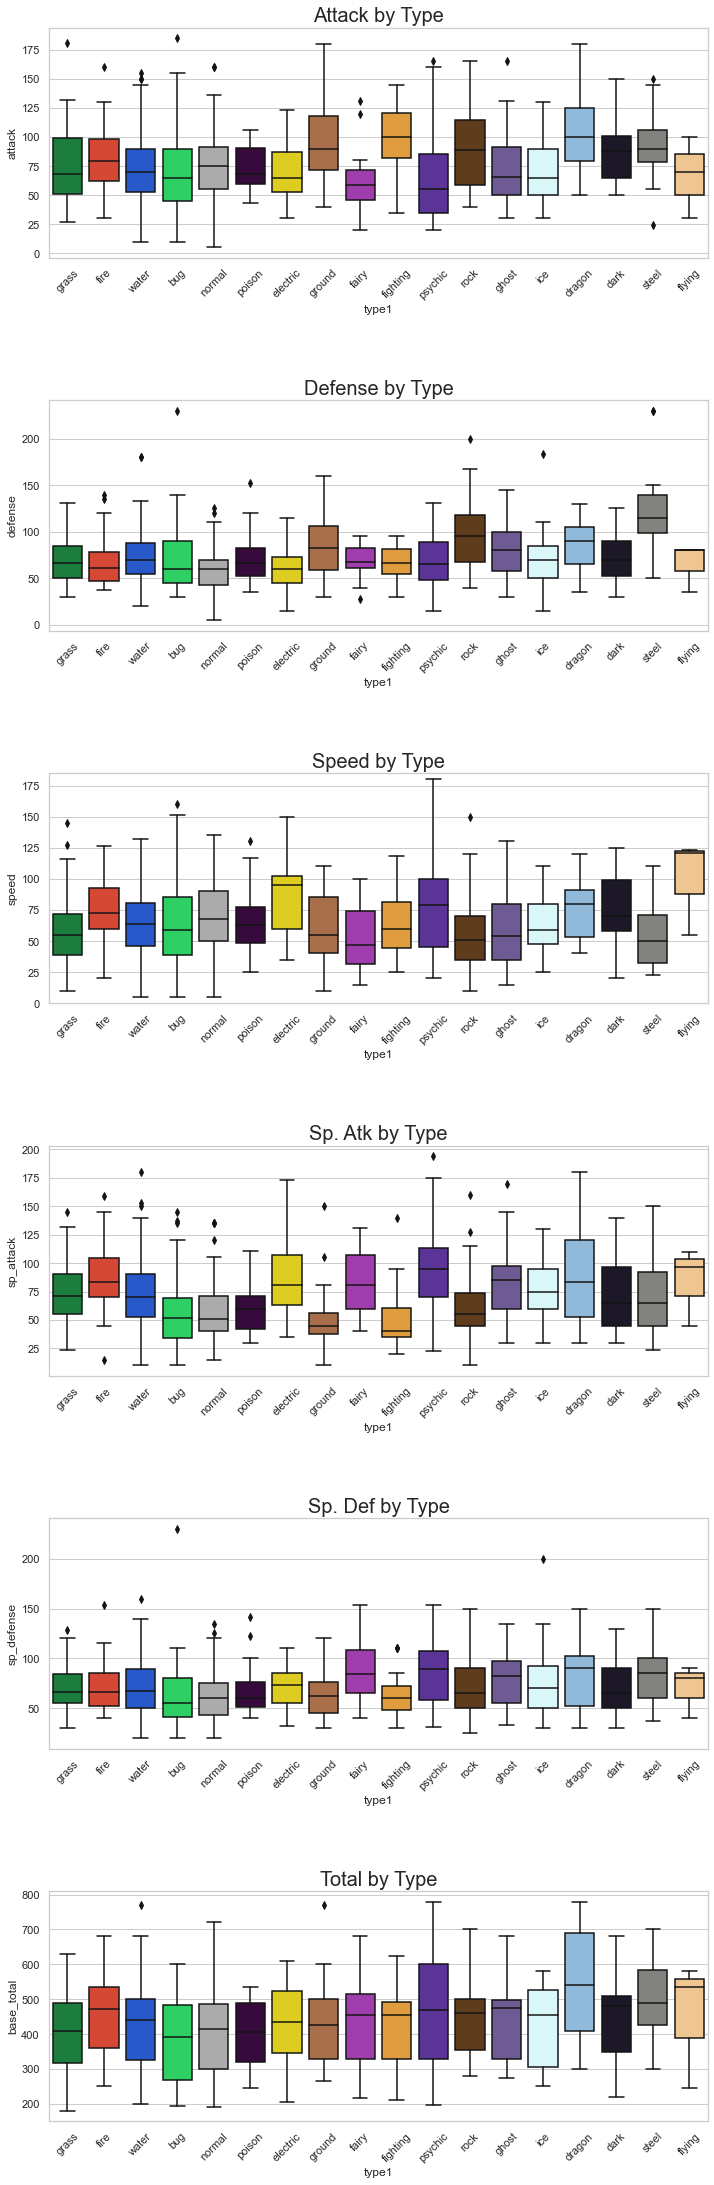

In [15]:
#Creating a dictionnary associating every type with a color defined by the game. This just a cool way to visualize the
#Following boxplots.
pokemon_color_palette = dict({"water":"#0D4EE5", "normal":"#ABABAB", "bug":"#13EA5D", "grass":"#0C8D39", "psychic":"#5823A8",
 "fire":"#EF341B", "electric":"#ffe500", "rock":"#6A3D11", "dragon":"#85BAE5", "fairy":"#AC2ABE",
"ground":"#B96B3B", "poison":"#3C0344", "ghost":"#6B529C", "fighting":"#FAA124", "steel":"#82827f",
"ice":"#D3FCFF", "flying":"#ffc882", "dark":"#1b152b"})

#Boxplot for each type. This is intersting because it allows us to see the differences of stats depending on types.
fig, axs = plt.subplots(6, 1, figsize = (10,30)) #figsize change the size of the figure

#Creating 6 subplot that will display 6 figures at the same time 1 over the other
ax1 = plt.subplot2grid((6, 1), (0, 0)) 
ax2 = plt.subplot2grid((6, 1), (1, 0))
ax3 = plt.subplot2grid((6, 1), (2, 0))
ax4 = plt.subplot2grid((6, 1), (3, 0))
ax5 = plt.subplot2grid((6, 1), (4, 0))
ax6 = plt.subplot2grid((6, 1), (5, 0))



#Setting the title of each figure
ax1.set_title("Attack by Type", fontsize =20)
ax2.set_title("Defense by Type", fontsize =20)
ax3.set_title("Speed by Type", fontsize =20)
ax4.set_title("Sp. Atk by Type", fontsize =20)
ax5.set_title("Sp. Def by Type", fontsize =20)
ax6.set_title("Total by Type", fontsize =20)
ax3.set_ylim(0, 185)

fig.tight_layout(h_pad = 8.5) #To better seperate the figure

#Creating the boxplot. We add the two columns (type1 and attack for instance) and we used library seasborn to do so.
sns.boxplot(x = "type1", y = "attack",
            data = pkmn, palette = pokemon_color_palette,  ax=ax1) 


sns.boxplot(x = "type1", y = "defense",
            data = pkmn, palette = pokemon_color_palette, ax=ax2)


sns.boxplot(x = "type1", y = "speed", 
            data = pkmn, palette = pokemon_color_palette, ax=ax3)
sns.boxplot(x = "type1", y = "sp_attack",
            data = pkmn, palette = pokemon_color_palette, ax=ax4)


sns.boxplot(x = "type1", y = "sp_defense", 
            data = pkmn, palette = pokemon_color_palette, ax=ax5)


sns.boxplot(x = "type1", y = "base_total", 
            data = pkmn, palette = pokemon_color_palette, ax=ax6)

sns.set_context("paper") # aesthetics
sns.set(style="whitegrid", palette="muted")

#We do a for loop to plot every figure
for ax in fig.axes: 
    plt.sca(ax)
    plt.xticks(rotation= 45)

plt.show()

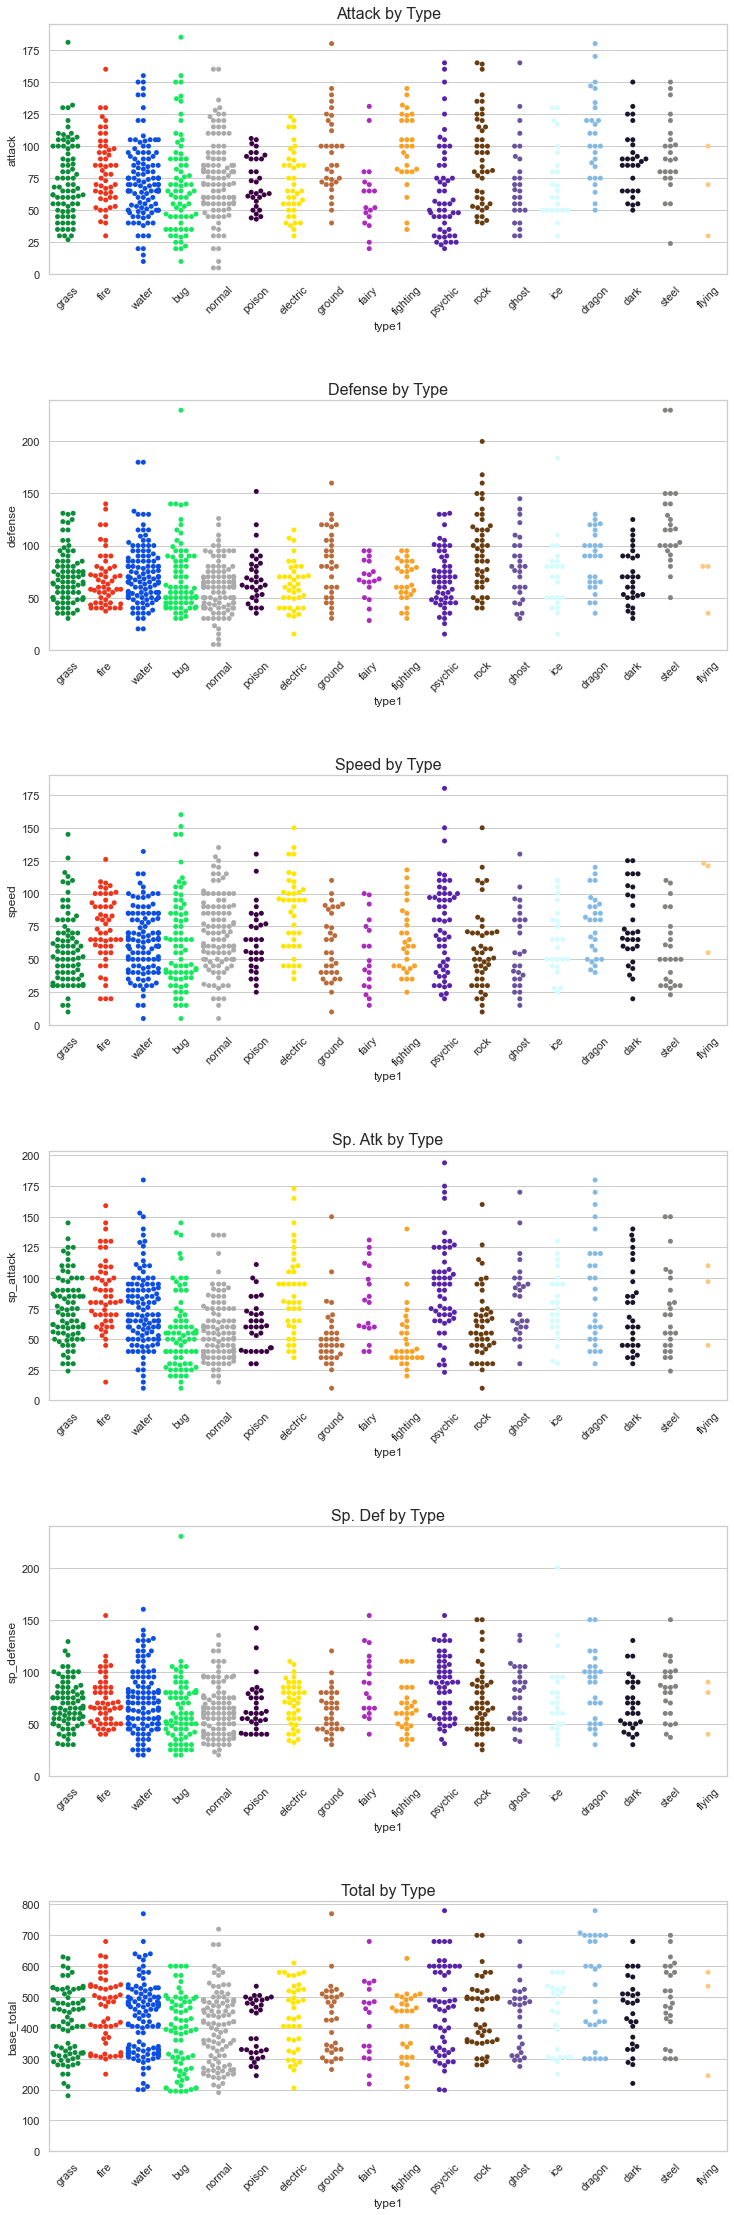

In [16]:
#another way to plot boxplots

fig, axs = plt.subplots(6, 1, figsize = (10,30))

ax1 = plt.subplot2grid((6, 1), (0, 0)) 
ax2 = plt.subplot2grid((6, 1), (1, 0))
ax3 = plt.subplot2grid((6, 1), (2, 0))
ax4 = plt.subplot2grid((6, 1), (3, 0))
ax5 = plt.subplot2grid((6, 1), (4, 0))
ax6 = plt.subplot2grid((6, 1), (5, 0))


fig.tight_layout(pad = 0.4, w_pad = 3.0, h_pad = 8.5)

ax1.set_title("Attack by Type", fontsize =16)
ax2.set_title("Defense by Type", fontsize =16)
ax3.set_title("Speed by Type", fontsize =16)
ax4.set_title("Sp. Atk by Type", fontsize =16)
ax5.set_title("Sp. Def by Type", fontsize =16)
ax6.set_title("Total by Type", fontsize =16)

ax1.set_ylim(0, max(pkmn.attack) + 10)
ax2.set_ylim(0, max(pkmn.defense) + 10)
ax3.set_ylim(0, max(pkmn.speed) + 10)
ax4.set_ylim(0, max(pkmn.sp_attack) + 10)
ax5.set_ylim(0, max(pkmn.sp_defense) + 10)
ax6.set_ylim(0, max(pkmn.base_total) + 30)

sns.swarmplot(x = "type1", y = "attack", 
              data = pkmn, palette = pokemon_color_palette,  ax=ax1) 
sns.swarmplot(x = "type1", y = "defense",
              data = pkmn, palette = pokemon_color_palette, ax=ax2)


sns.swarmplot(x = "type1", y = "speed", 
              data = pkmn, palette = pokemon_color_palette, ax=ax3)


sns.swarmplot(x = "type1", y = "sp_attack",
              data = pkmn, palette = pokemon_color_palette, ax=ax4)


sns.swarmplot(x = "type1", y = "sp_defense", 
              data = pkmn, palette = pokemon_color_palette, ax=ax5)


sns.swarmplot(x = "type1", y = "base_total", 
              data = pkmn, palette = pokemon_color_palette, ax=ax6)

sns.set_context("paper") # aesthetics
sns.set(style="whitegrid", palette="muted")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation= 45)
    
plt.show()

In [17]:
# Now we want to dive into more details and check the difference between type
#Creating dataframes containing pokemon with only grass, fire, water and electric respectively
grass= pkmn.loc[pkmn['type1'] == 'grass']
fire= pkmn.loc[pkmn['type1'] == 'fire']
water=pkmn.loc[pkmn['type1'] == 'water']
electric=pkmn.loc[pkmn['type1'] == 'electric']

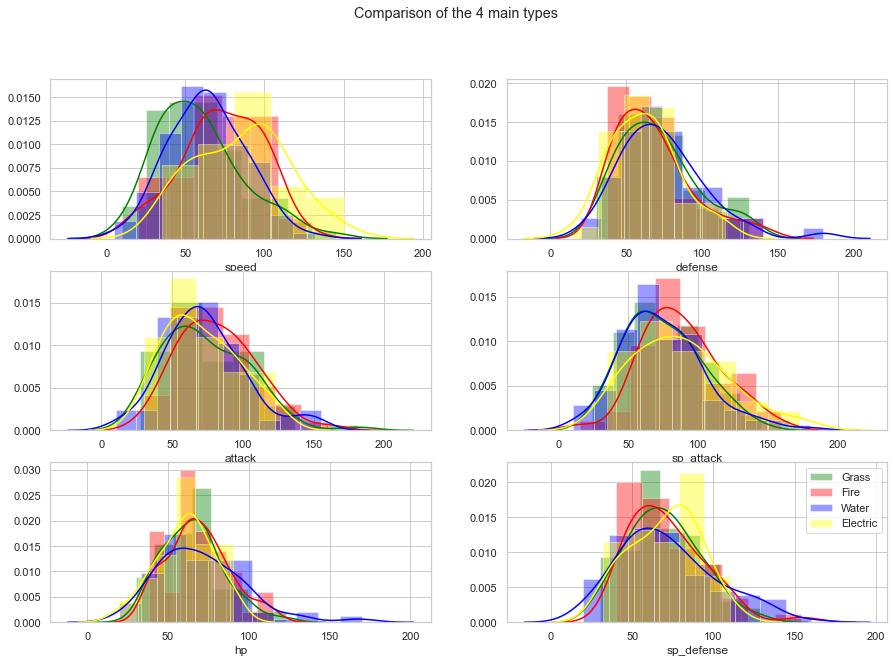

In [18]:

#Comparing each stat between pokemon type 1

fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))

#Seperating the speed for each typ

speed1=grass["speed"]
speed2=fire["speed"]
speed3=water["speed"]
speed4=electric["speed"]
sns.distplot(speed1,color='Green',ax=axes[0][0])
sns.distplot(speed2,color='Red',ax=axes[0][0])
sns.distplot(speed3,color='Blue',ax=axes[0][0])
sns.distplot(speed4,color='Yellow',ax=axes[0][0])
plt.legend(labels=['Grass', 'Fire', 'Water','Electric'])


att1=grass["attack"]
att2=fire["attack"]
att3=water["attack"]
att4=electric["attack"]
sns.distplot(att1,color='Green',ax=axes[1][0])
sns.distplot(att2,color='Red',ax=axes[1][0])
sns.distplot(att3,color='Blue',ax=axes[1][0])
sns.distplot(att4,color='Yellow',ax=axes[1][0])
plt.legend(labels=['Grass', 'Fire', 'Water','Electric'])

def1=grass["defense"]
def2=fire["defense"]
def3=water["defense"]
def4=electric["defense"]
sns.distplot(def1,color='Green',ax=axes[0][1])
sns.distplot(def2,color='Red',ax=axes[0][1])
sns.distplot(def3,color='Blue',ax=axes[0][1])
sns.distplot(def4,color='Yellow',ax=axes[0][1])
plt.legend(labels=['Grass', 'Fire', 'Water','Electric'])


spa1=grass["sp_attack"]
spa2=fire["sp_attack"]
spa3=water["sp_attack"]
spa4=electric["sp_attack"]
sns.distplot(spa1,color='Green',ax=axes[1][1])
sns.distplot(spa2,color='Red',ax=axes[1][1])
sns.distplot(spa3,color='Blue',ax=axes[1][1])
sns.distplot(spa4,color='Yellow',ax=axes[1][1])
plt.legend(labels=['Grass', 'Fire', 'Water','Electric'])

sdef1=grass["sp_defense"]
sdef2=fire["sp_defense"]
sdef3=water["sp_defense"]
sdef4=electric["sp_defense"]
sns.distplot(sdef1,color='Green',ax=axes[2][1])
sns.distplot(sdef2,color='Red',ax=axes[2][1])
sns.distplot(sdef3,color='Blue',ax=axes[2][1])
sns.distplot(sdef4,color='Yellow',ax=axes[2][1])
plt.legend(labels=['Grass', 'Fire', 'Water','Electric'])

hp1=grass["hp"]
hp2=fire["hp"]
hp3=water["hp"]
hp4=electric["hp"]
sns.distplot(hp1,color='Green',ax=axes[2][0])
sns.distplot(hp2,color='Red',ax=axes[2][0])
sns.distplot(hp3,color='Blue',ax=axes[2][0])
sns.distplot(hp4,color='Yellow',ax=axes[2][0])
plt.legend(labels=['Grass', 'Fire', 'Water','Electric'])

fig.suptitle('Comparison of the 4 main types') # or plt.suptitle('Main title')
plt.show()


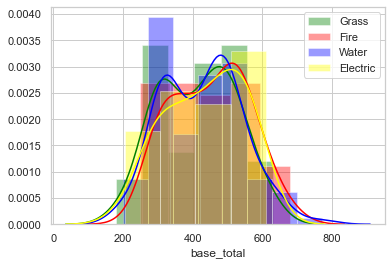

In [19]:
#Plotting histogram that shows the difference of base_total for each type
speed1=grass["base_total"]
speed2=fire["base_total"]
speed3=water["base_total"]
speed4=electric["base_total"]
sns.distplot(speed1,color='green')
sns.distplot(speed2,color='red')
sns.distplot(speed3,color='Blue')
sns.distplot(speed4,color='Yellow')
plt.legend(labels=['Grass', 'Fire', 'Water','Electric'])

([<matplotlib.patches.Wedge at 0x2823f9ca088>,
 [Text(-1.1027777585876863, 0.4731608766205412, 'Legendary'),
  Text(1.0108796526475161, -0.4337307089234487, 'Not Legendary')],
 [Text(-0.6432870258428169, 0.27601051136198235, '9.3%'),
  Text(0.5513889014440996, -0.23658038668551745, '90.7%')])

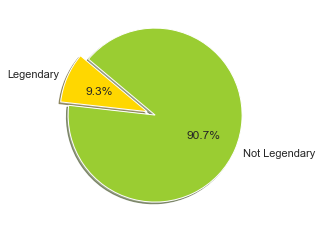

In [20]:
#Clearing pie chart to represent the percetage of legendaries and non legendaries pokemon
import matplotlib.pyplot as plt

labels = ["Legendary","Not Legendary"]
values = [sum(pkmn.is_legendary), 751-sum(pkmn.is_legendary)]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)
plt.pie(values, labels=labels, colors=colors,explode=explode,
autopct='%1.1f%%', shadow=True, startangle=140)

In [21]:
pkmn_leg= pkmn.loc[pkmn['is_legendary'] == True]
pkmn_non_leg= pkmn.loc[pkmn['is_legendary'] == False]

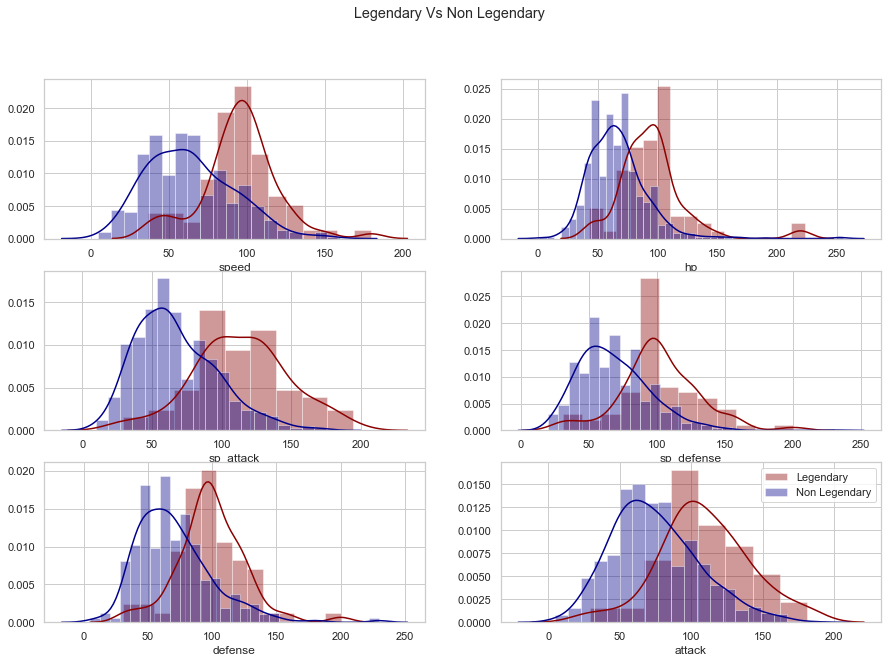

In [22]:
#Comparing each stat between legendary and non legendary

fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))

speed=pkmn_leg["speed"]
speed1=pkmn_non_leg["speed"]
sns.distplot(speed,color='darkred',ax=axes[0][0])
sns.distplot(speed1,color='darkblue',ax=axes[0][0])
plt.legend(labels=['Legendary', 'Non Legendary'])

hp=pkmn_leg["hp"]
hp1=pkmn_non_leg["hp"]
sns.distplot(hp,color='darkred',ax=axes[0][1])
sns.distplot(hp1,color='darkblue',ax=axes[0][1])
plt.legend(labels=['Legendary', 'Non Legendary'])

sp_at=pkmn_leg["sp_attack"]
sp_at1=pkmn_non_leg["sp_attack"]
sns.distplot(sp_at,color='darkred',ax=axes[1][0])
sns.distplot(sp_at1,color='darkblue',ax=axes[1][0])
plt.legend(labels=['Legendary', 'Non Legendary'])

sp_def=pkmn_leg["sp_defense"]
sp_def1=pkmn_non_leg["sp_defense"]
sns.distplot(sp_def,color='darkred', ax=axes[1][1])
sns.distplot(sp_def1,color='darkblue', ax=axes[1][1])
plt.legend(labels=['Legendary', 'Non Legendary'])

defense=pkmn_leg["defense"]
defense1=pkmn_non_leg["defense"]
sns.distplot(defense,color='darkred', ax=axes[2][0])
sns.distplot(defense1,color='darkblue', ax=axes[2][0])
plt.legend(labels=['Legendary', 'Non Legendary'])

attack=pkmn_leg["attack"]
attack1=pkmn_non_leg["attack"]
sns.distplot(attack,color='darkred', ax=axes[2][1])
sns.distplot(attack1,color='darkblue', ax=axes[2][1])
plt.legend(labels=['Legendary', 'Non Legendary'])

fig.suptitle('Legendary Vs Non Legendary') # or plt.suptitle('Main title')
plt.show()


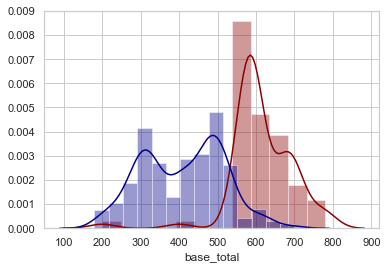

In [23]:
total=pkmn_leg["base_total"]
total1=pkmn_non_leg["base_total"]
sns.distplot(total,color='darkred')
sns.distplot(total1,color='darkblue')

In [24]:
#Columns Cleaning. I want to create a data frme containing only the stats f the pokemon

pkmn1=pkmn.drop(pkmn.columns[0:19],axis=1)
pkmn1.drop(["base_egg_steps","base_happiness","classfication","experience_growth","japanese_name","pokedex_number",'type1','type2','base_total','height_m','is_legendary','weight_kg','percentage_male','height_m','name','capture_rate'],axis=1,inplace=True)

In [25]:
pkmn1.drop(["generation"],axis=1,inplace=True)

In [26]:
#Comparing pokemon starters in each generation

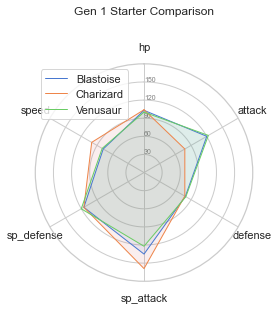

In [55]:
from math import pi

categories=list(['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'])
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([30,60,90,120,150], ["30","60","90","120","150"], color="grey", size=7)
plt.ylim(0,180)

 #------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=pkmn1.loc[8].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)
# Ind2
values=pkmn1.loc[5].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'r', alpha=0.1)
#Ind3
values=pkmn1.loc[2].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'g', alpha=0.1)
# Add legend
plt.title("Gen 1 Starter Comparison", y=1.20)
plt.legend(labels=["Blastoise","Charizard","Venusaur"], loc="best")

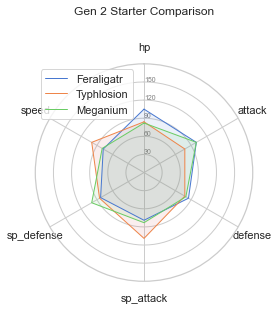

In [56]:
categories=list(['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'])
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([30,60,90,120,150], ["30","60","90","120","150"], color="grey", size=7)
plt.ylim(0,180)

 #------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=pkmn1.loc[159].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)
# Ind2
values=pkmn1.loc[156].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'r', alpha=0.1)
#Ind3
values=pkmn1.loc[153].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'g', alpha=0.1)
# Add legend
plt.title("Gen 2 Starter Comparison", y=1.20)
plt.legend(labels=["Feraligatr","Typhlosion","Meganium"], loc="best")

No handles with labels found to put in legend.


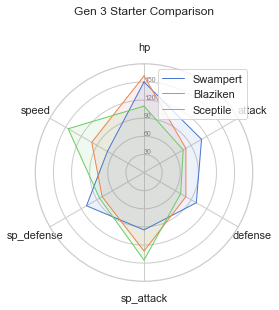

In [57]:
categories=list(['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'])
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([30,60,90,120,150], ["30","60","90","120","150"], color="grey", size=7)
plt.ylim(0,180)

 #------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=pkmn1.loc[259].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)
# Ind2
values=pkmn1.loc[256].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'r', alpha=0.1)
#Ind3
values=pkmn1.loc[253].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'g', alpha=0.1)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Gen 3 Starter Comparison", y=1.20)
plt.legend(labels=["Swampert","Blaziken","Sceptile"], loc="best")

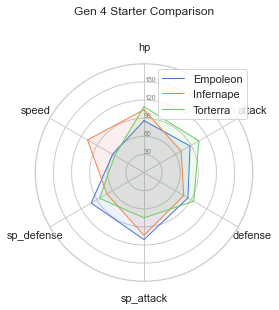

In [58]:
categories=list(['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'])
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([30,60,90,120,150], ["30","60","90","120","150"], color="grey", size=7)
plt.ylim(0,180)

 #------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=pkmn1.loc[394].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)
# Ind2
values=pkmn1.loc[391].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'r', alpha=0.1)
#Ind3
values=pkmn1.loc[388].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'g', alpha=0.1)
# Add legend
plt.title("Gen 4 Starter Comparison", y=1.20)
plt.legend(labels=["Empoleon","Infernape","Torterra"], loc="best")

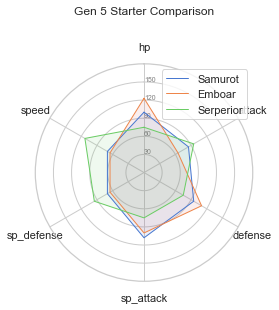

In [59]:
categories=list(['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'])
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([30,60,90,120,150], ["30","60","90","120","150"], color="grey", size=7)
plt.ylim(0,180)

 #------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=pkmn1.loc[502].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)
# Ind2
values=pkmn1.loc[499].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'r', alpha=0.1)
#Ind3
values=pkmn1.loc[496].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'g', alpha=0.1)
# Add legend
plt.title("Gen 5 Starter Comparison", y=1.20)
plt.legend(labels=["Samurot","Emboar","Serperior"], loc="best")

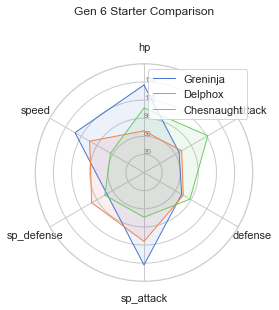

In [61]:
categories=list(['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'])
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([30,60,90,120,150], ["30","60","90","120","150"], color="grey", size=7)
plt.ylim(0,180)

 #------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=pkmn1.loc[657].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)
# Ind2
values=pkmn1.loc[654].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'r', alpha=0.1)
#Ind3
values=pkmn1.loc[651].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'g', alpha=0.1)
# Add legend
plt.title("Gen 6 Starter Comparison", y=1.20)
plt.legend(labels=["Greninja","Delphox","Chesnaught"], loc="best")

No handles with labels found to put in legend.


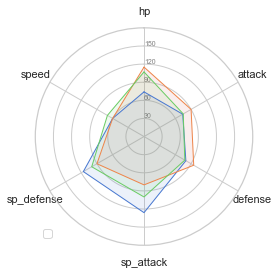

In [34]:
categories=list(['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'])
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([30,60,90,120,150], ["30","60","90","120","150"], color="grey", size=7)
plt.ylim(0,180)

 #------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=pkmn1.loc[729].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)
# Ind2
values=pkmn1.loc[726].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'r', alpha=0.1)
#Ind3
values=pkmn1.loc[723].values.flatten().tolist()
values+=values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'g', alpha=0.1)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [63]:
pkmn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

In [85]:
import plotly.express as px
px.scatter(pkmn, x="weight_kg", y="height_m", size="defense", size_max=30, hover_name="name",labels=dict(weight_kg="Weight in kg", height_m="height in m"),title="Relation between height, weight and Defence")


In [86]:
px.scatter(pkmn, x="weight_kg", y="height_m", size="speed", size_max=30, hover_name="name",labels=dict(weight_kg="Weight in kg", height_m="height in m"),title="Relation between height, weight and Speed")